## Beschreibung des Problems

Ein Unternehmen hat eine Umfrage durchgeführt und Informationen über Kunden gesammelt, die ein bestimmtes Produkt gekauft haben, und über Kunden, die es nicht gekauft haben. Das Unternehmen möchte eine ML Modell erstellen, mit dessen Hilfe sie vorhersagen können, welche Kunden das Produkt in Zukunft voraussichtlich kaufen werden. Mit dieser Anwendung können sie beispielsweise ihre Werbestrategie entwerfen und optimieren. 

## Teil 1: Laden und Überprüfen von Datensatz Umfrage.csv (auf dem Laufwerk, unter Projektarbeit)
Laden Sie den Datensatz Umfrage.csv (auf dem Laufwerk, unter Projektarbeit). Ziel ist es, die letzte Spalte (Label) in der CSV-Datei aus den vorherigen Spalten vorherzusagen.

Durchsuchen Sie den Datensatz und printen Sie Informationen (oder schreiben Sie Text), indem Sie die folgenden Fragen beantworten:

- Wie viele Datenpunkte haben wir?
- Wie viele Features haben wir?
- Was sind die Datentypen (Data type) von Features?
- Wie viele Klassen gibt es?
- Was sind die möglichen Feature-Werte (welche Werte kann jedes Feature haben)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Umfrage.csv")

df.head()

,Name,Height,Weight,Drink,Age,PLZ,Einkommen,Kaeufer
0,Unbekannt,165,102,Nein,35,16487,57098,Ja
1,Unbekannt,198,61,Oft,47,45252,77040,Ja
2,Unbekannt,191,68,Oft,73,75815,57805,Ja
3,Unbekannt,168,100,Nein,66,52188,62749,Nein
4,Unbekannt,188,94,Nein,60,80761,55282,Nein


In [3]:
print("Anzahl der Datenpunkte:",df.shape[0])
print("Anzahl der Features:",df.shape[1]-1) # Kaeufer ist Label
print("Datentypen der Features:\n",df.dtypes)
print("Anzahl der Klassen:",df["Kaeufer"].nunique())

Anzahl der Datenpunkte: 15000
Anzahl der Features: 7
Datentypen der Features:
 Name         object
Height        int64
Weight        int64
Drink        object
Age           int64
PLZ           int64
Einkommen     int64
Kaeufer      object
dtype: object
Anzahl der Klassen: 2


In [4]:
# Feature-Werte in sortierter Reihenfolge

print("Feature-Wert von Name:",df["Name"].unique())
print("Feature-Wert von Height:",np.sort(df["Height"].unique()))
print("Feature-Wert von Weight:",np.sort(df["Weight"].unique()))
print("Feature-Wert von Drink:",df["Drink"].unique())
print("Feature-Wert von Age:",np.sort(df["Age"].unique()))
print("Feature-Wert von PLZ:",np.sort(df["PLZ"].unique()))
print("Feature-Wert von Einkommen:",np.sort(df["Einkommen"].unique()))

Feature-Wert von Name: ['Unbekannt']
Feature-Wert von Height: [151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201]
Feature-Wert von Weight: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112]
Feature-Wert von Drink: ['Nein' 'Oft' 'Gelegentlich']
Feature-Wert von Age: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75]
Feature-Wert von PLZ: [10031 10052 10059 ... 82983 82996 82999]
Feature-Wert von Einkommen: [ 23003  23011  23019 ... 109975 109978 109980]


In [5]:
df.describe() #alle Min/Max usw.

,Height,Weight,Age,PLZ,Einkommen
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,175.939267,84.025067,50.118933,46374.281533,66378.297800
std,14.508766,16.116468,14.461381,21054.436534,25079.245091
min,151.000000,56.000000,25.000000,10031.000000,23003.000000
25%,163.000000,70.000000,38.000000,28065.000000,44561.000000
50%,176.000000,84.000000,50.000000,46274.500000,66524.500000
75%,189.000000,98.000000,63.000000,64761.500000,88125.250000
max,201.000000,112.000000,75.000000,82999.000000,109980.000000


In [6]:
df['Kaeufer'].value_counts() #Anzahl Käufer und Nichtkäufer -> balanced

Ja      7602
Nein    7398
Name: Kaeufer, dtype: int64

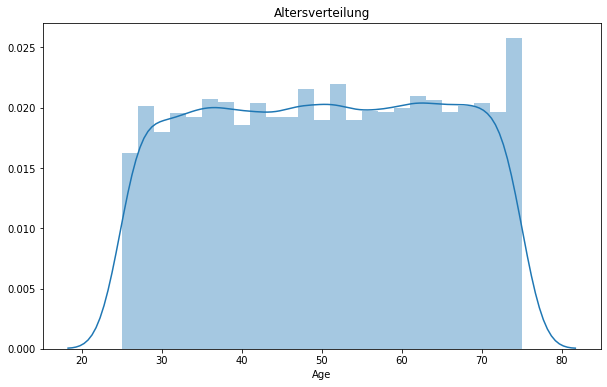

In [7]:
plt.figure(figsize=(10,6))
plt.title('Altersverteilung')
sns.distplot(df['Age'])

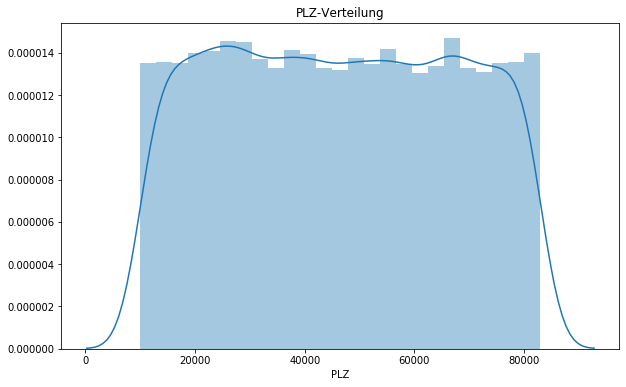

In [8]:
plt.figure(figsize=(10,6))
plt.title('PLZ-Verteilung')
sns.distplot(df['PLZ'])

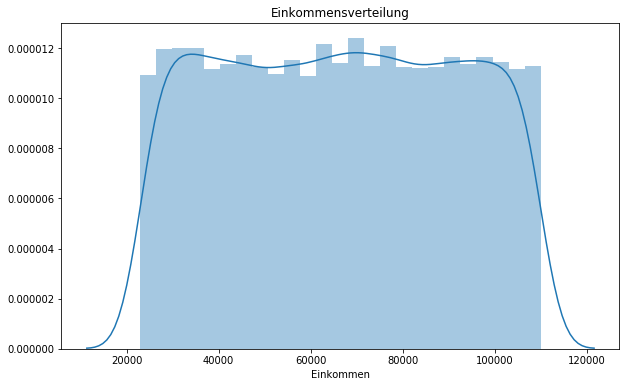

In [9]:
plt.figure(figsize=(10,6))
plt.title('Einkommensverteilung')
sns.distplot(df['Einkommen'])

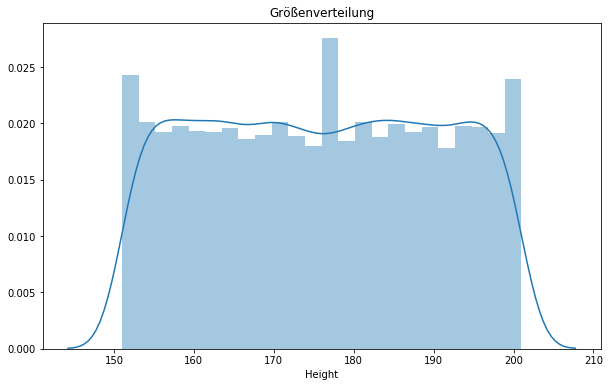

In [10]:
plt.figure(figsize=(10,6))
plt.title('Größenverteilung')
sns.distplot(df['Height'])

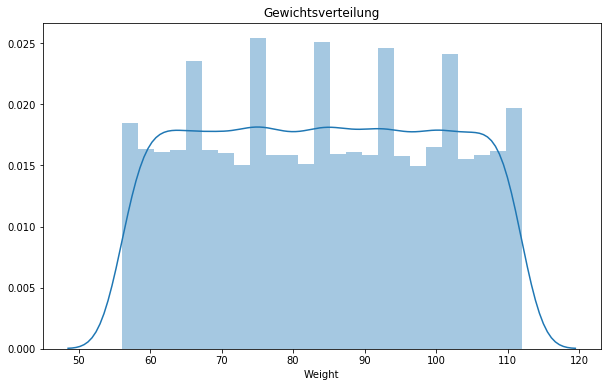

In [11]:
plt.figure(figsize=(10,6))
plt.title('Gewichtsverteilung')
sns.distplot(df['Weight'])

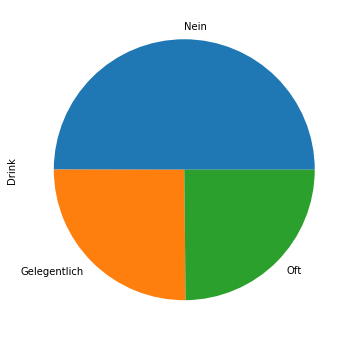

In [12]:
df['Drink'].value_counts().plot(kind='pie', figsize=(6,6))

## Teil 2: Bereiten Sie die Daten vor

- Entfernen Sie unnötige Features (falls vorhanden)
- Bei allen Datenpunkten sind alle Features vorhanden. Deswegen, brauchen Sie keine Imputation. 
- Codieren Sie kategoriale Features und Labels (Hinweis: Verwenden Sie pd.get_dummies)

In [13]:
df = df.drop("Name", axis = 1) # Name entfernt
df.head()

,Height,Weight,Drink,Age,PLZ,Einkommen,Kaeufer
0,165,102,Nein,35,16487,57098,Ja
1,198,61,Oft,47,45252,77040,Ja
2,191,68,Oft,73,75815,57805,Ja
3,168,100,Nein,66,52188,62749,Nein
4,188,94,Nein,60,80761,55282,Nein


In [14]:
df = pd.get_dummies(df, columns = ["Drink", "Kaeufer"]) # Codierung
df.head()

,Height,Weight,Age,PLZ,Einkommen,Drink_Gelegentlich,Drink_Nein,Drink_Oft,Kaeufer_Ja,Kaeufer_Nein
0,165,102,35,16487,57098,0,1,0,1,0
1,198,61,47,45252,77040,0,0,1,1,0
2,191,68,73,75815,57805,0,0,1,1,0
3,168,100,66,52188,62749,0,1,0,0,1
4,188,94,60,80761,55282,0,1,0,0,1


In [15]:
# Spalten entfernen, die voneinander abhängig sind
df = df.drop(["Drink_Gelegentlich","Kaeufer_Nein"], axis = 1) # Spalte "Drink_Gelegentlich" und "Kaeufer_Nein" entfernt
df.head()

,Height,Weight,Age,PLZ,Einkommen,Drink_Nein,Drink_Oft,Kaeufer_Ja
0,165,102,35,16487,57098,1,0,1
1,198,61,47,45252,77040,0,1,1
2,191,68,73,75815,57805,0,1,1
3,168,100,66,52188,62749,1,0,0
4,188,94,60,80761,55282,1,0,0


## Teil 3: Wählen Sie ein Modell

Tipp: Beginnen Sie mit train_test_split (random_state = 0) und verwenden Sie dann ein Modell (z. B. k-NN) und spielen Sie manuell mit seinen Hyperparametern. Überprüfen Sie, ob Sie gute Genauigkeitswerte erhalten können. Wenn nicht, verwenden Sie ein anderes Modell und wiederholen Sie den Vorgang, bis Sie glauben, ein gutes Modell zu haben.

Hinweis: Versuchen Sie ein Tree-Modell, wie Random Forrest. Natuerlich koennen Sie auch andere Modelle benutzen. 

In [16]:
X = df.drop("Kaeufer_Ja", axis = 1).values
y = df["Kaeufer_Ja"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25) 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=21)
model.fit(X_train, y_train)

print("Training-Score =",model.score(X_train, y_train)*100,"%") 
print("Test-Score =",model.score(X_test, y_test)*100,"%") 

Training-Score = 85.09333333333333 %
Test-Score = 83.17333333333333 %


In [17]:
#ab hier for-schleife statt random_state = 0, um über alle train_test_splits zu iterieren und anschließend die Werte zu mitteln -> robuste Ergebnisse
scorestest = []
scorestrain = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
     
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    scorestest.append(model.score(X_test, y_test))
    scorestrain.append(model.score(X_train, y_train))
    scoretest=np.asarray(scorestest)
    scoretrain=np.asarray(scorestrain)

print("Modell: LogisticRegression")
print("Training-Score =",scoretrain.mean()*100,"%") 
print("Test-Score =",scoretest.mean()*100,"%") 

Modell: LogisticRegression
Training-Score = 70.92100444444445 %
Test-Score = 70.87376 %


In [18]:
scorestest = []
scorestrain = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors=100) # mit diesem Hyperparameter habe ich gespielt
    model.fit(X_train, y_train)
    
    scorestest.append(model.score(X_test, y_test))
    scorestrain.append(model.score(X_train, y_train))
    scoretest=np.asarray(scorestest)
    scoretrain=np.asarray(scorestrain)

print("Modell: KNN")
print("Training-Score =",scoretrain.mean()*100,"%") 
print("Test-Score =",scoretest.mean()*100,"%") 

Modell: KNN
Training-Score = 82.93066666666667 %
Test-Score = 82.30933333333334 %


In [19]:
scorestest = []
scorestrain = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model_svc = SVC(kernel = "rbf", gamma = 1, C = 1) # mit diesen Hyperparametern habe ich gespielt
    model_svc.fit(X_train, y_train)
    
    scorestest.append(model_svc.score(X_test, y_test))
    scorestrain.append(model_svc.score(X_train, y_train))
    scoretest=np.asarray(scorestest)
    scoretrain=np.asarray(scorestrain)

print("Modell: SVM mit Kernel")
print("Training-Score =",scoretrain.mean()*100,"%") 
print("Test-Score =",scoretest.mean()*100,"%") 

Modell: SVM mit Kernel
Training-Score = 88.99822222222221 %
Test-Score = 85.008 %


In [20]:
scorestest = []
scorestrain = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    model_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=500) # mit diesen Hyperparametern habe ich gespielt
    model_dtc.fit(X_train, y_train)
    
    scorestest.append(model_dtc.score(X_test, y_test))
    scorestrain.append(model_dtc.score(X_train, y_train))
    scoretest=np.asarray(scorestest)
    scoretrain=np.asarray(scorestrain)

print("Modell: DecisionTreeClassifier")
print("Training-Score =",scoretrain.mean()*100,"%") 
print("Test-Score =",scoretest.mean()*100,"%") 

Modell: DecisionTreeClassifier
Training-Score = 89.70862222222223 %
Test-Score = 89.63866666666665 %


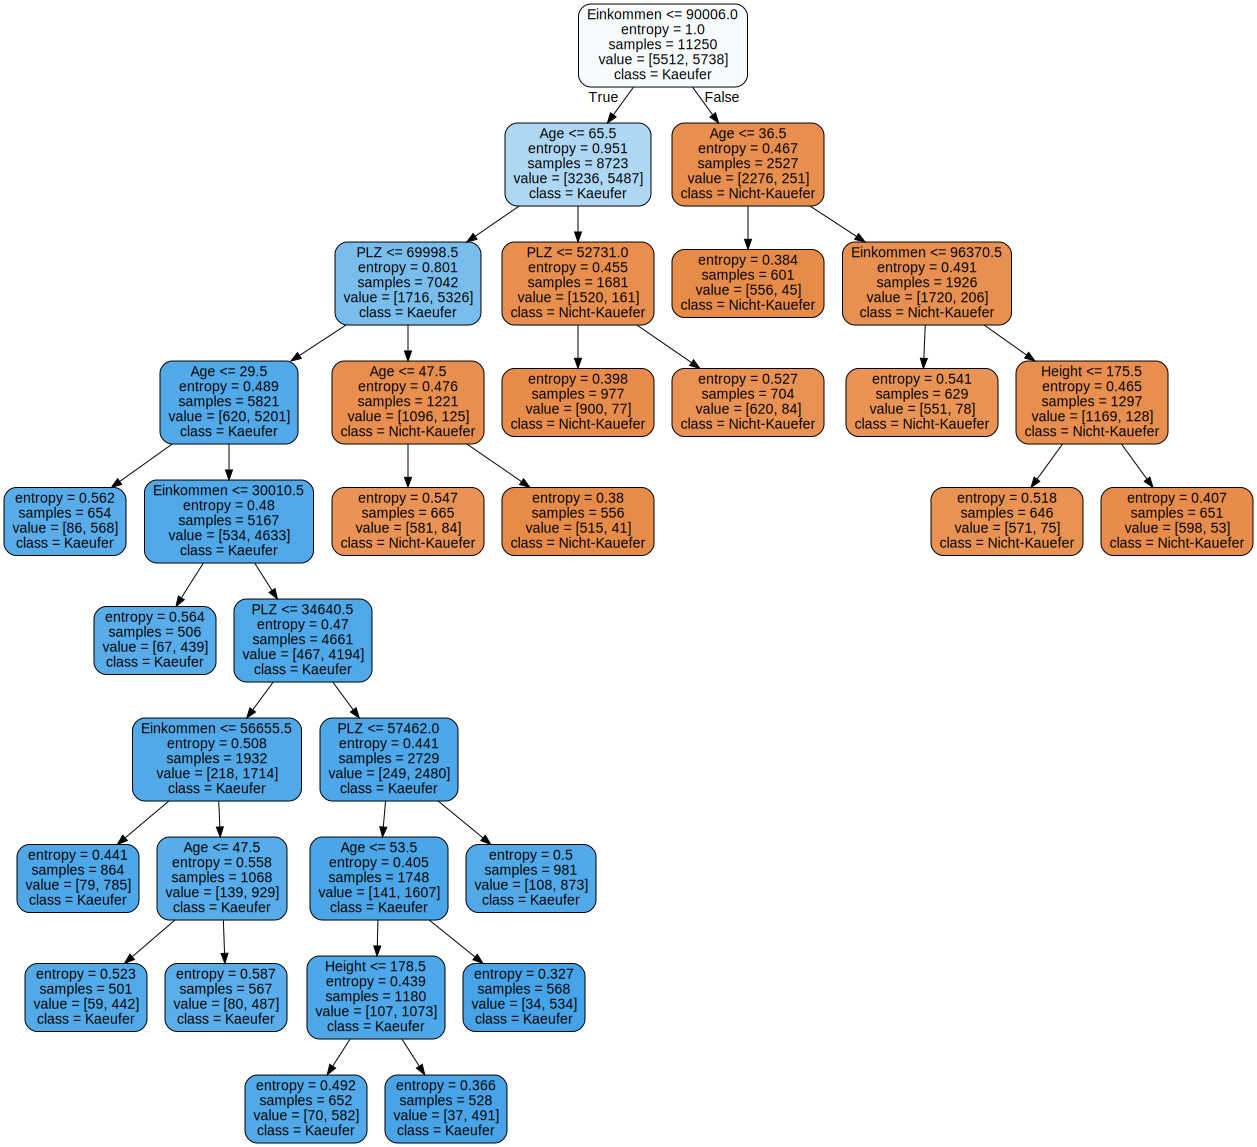

In [21]:
from sklearn.tree import export_graphviz
import graphviz
tree = export_graphviz(model_dtc, None, 
                       feature_names = ["Height", "Weight", "Age", "PLZ", "Einkommen", "Drink_Nein", "Drink_Ja"], 
                       class_names = ["Nicht-Kauefer", "Kaeufer"],
                       rounded = True,
                       filled = True)
graphviz.Source(tree)

In [22]:
scorestest = []
scorestrain = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    model = RandomForestClassifier(n_estimators=500, criterion='entropy',max_depth=10,min_samples_leaf=50) # mit diesen Hyperparametern habe ich gespielt
    model.fit(X_train, y_train)
    
    scorestest.append(model.score(X_test, y_test))
    scorestrain.append(model.score(X_train, y_train))
    scoretest=np.asarray(scorestest)
    scoretrain=np.asarray(scorestrain)

print("Modell: RandomForestClassifier")
print("Training-Score =",scoretrain.mean()*100,"%") 
print("Test-Score =",scoretest.mean()*100,"%") 

Modell: RandomForestClassifier
Training-Score = 89.71288888888888 %
Test-Score = 89.61866666666667 %


## Teil 4: Overfitting und underfitting

Experimentieren Sie mit Hyperparametern, um eine Überanpassung (Overfitting) zu zeigen. Beschreiben Sie, was Sie getan und beobachtet haben.

Weiterm, experimentieren Sie mit Hyperparametern, um eine Unteranpassung (Underfitting) zu zeigen. Beschreiben Sie, was Sie getan und beobachtet haben.

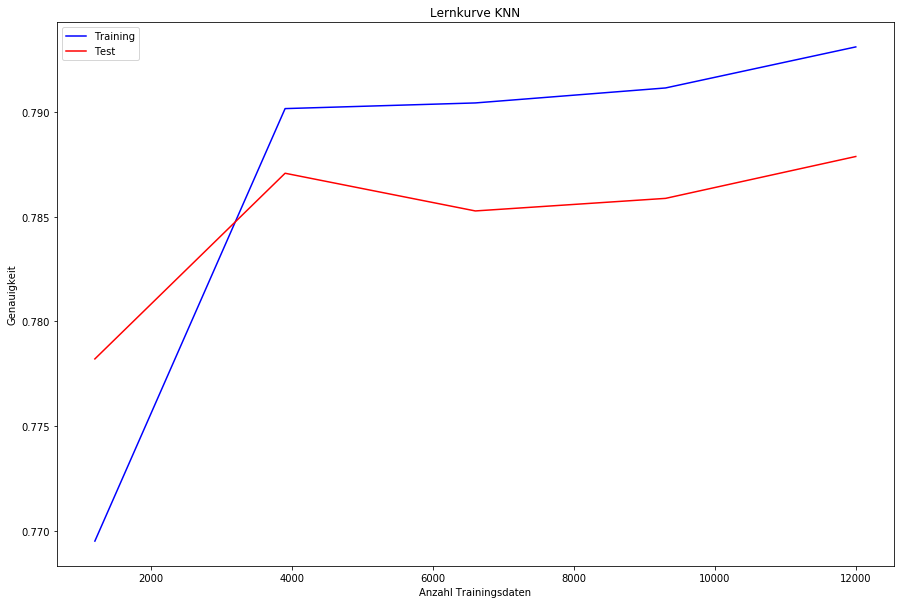

In [23]:
# Learning Curve KNN

train_sizes_abs, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=21), X, y)

#---plot
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(train_sizes_abs, np.mean(train_scores, axis = 1), c='blue', label='Training')
plt.plot(train_sizes_abs, np.mean(test_scores, axis = 1), c='red', label='Test')
plt.legend()
plt.xlabel('Anzahl Trainingsdaten')
plt.ylabel('Genauigkeit')
plt.title("Lernkurve KNN")
plt.show()

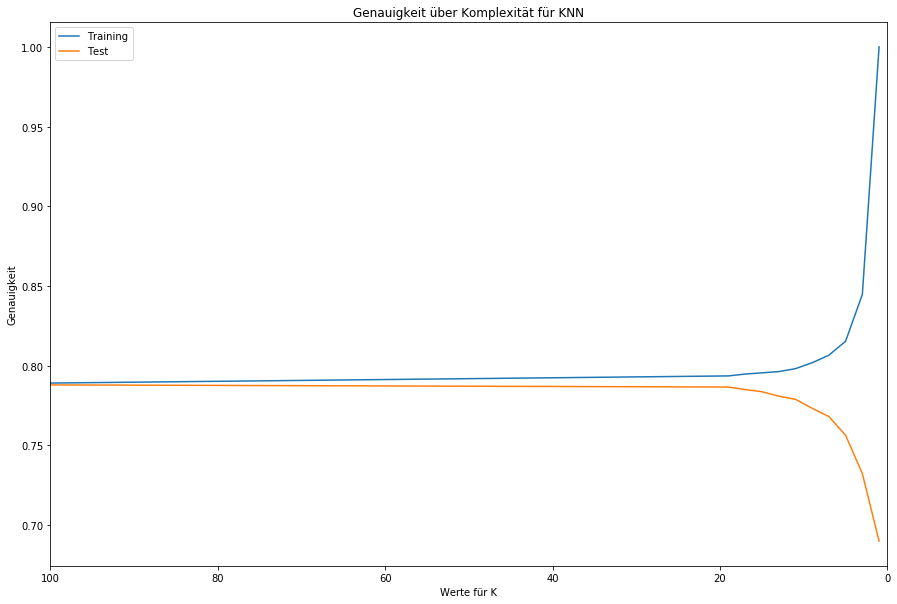

In [24]:
# Validation Curve KNN

param_range = np.array([1,3,5,7,9,11,13,15,17,19,100])

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), 
    X,
    y,
    param_name = "n_neighbors",
    param_range=param_range)

#---plot
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(param_range, np.mean(train_scores, axis = 1), label="Training")
plt.plot(param_range, np.mean(test_scores, axis = 1), label ="Test")
plt.legend()
# Hiermit drehen wir die X-Achse um, sie geht jetzt von 200 bis 1.
plt.xlim(np.max(param_range), 0)
plt.xlabel("Werte für K")
plt.ylabel("Genauigkeit")
plt.title("Genauigkeit über Komplexität für KNN")
plt.show()

Overfitting mit KNN für kleine K (<10) und Underfitting für K > 100, bestes K bei ca. 100

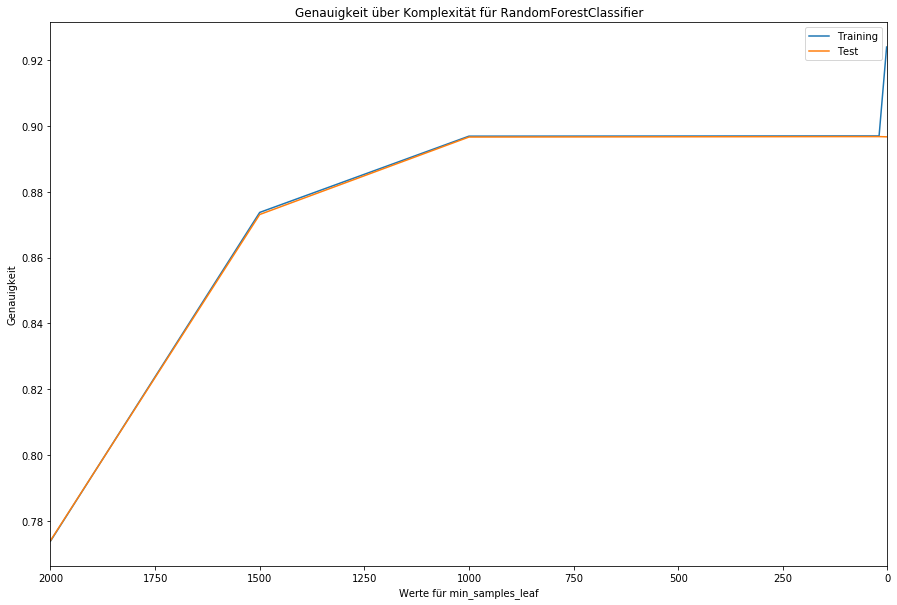

In [25]:
# Validation Curve RandomForest

param_range = np.array([2,20,50,100, 1000, 1500, 2000])

train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators=250), 
    X,
    y,
    param_name = "min_samples_leaf",
    param_range=param_range)

#---plot
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(param_range, np.mean(train_scores, axis = 1), label="Training")
plt.plot(param_range, np.mean(test_scores, axis = 1), label ="Test")
plt.legend()
# Hiermit drehen wir die X-Achse um, sie geht jetzt von 200 bis 1.
plt.xlim(np.max(param_range), 0)
plt.xlabel("Werte für min_samples_leaf")
plt.ylabel("Genauigkeit")
plt.title("Genauigkeit über Komplexität für RandomForestClassifier")
plt.show()

RandomForest: 
- Overfitting für kleine min_samples_leaf (<20)
- Underfitting für sehr große min_samples_leaf (>1000)

## Teil 5: Optimieren Sie Hyperparameter mithilfe der Gittersuche (GridSearch)

Hinweis: GridsearchCV benutzen um das beste bzw. die besten Hyperparameter festzustellen. 

In [28]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rnf", RandomForestClassifier(random_state=0))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [29]:
parameters = {'rnf__n_estimators': [100,250],
'rnf__max_depth': [30,50,80],
#'min_samples_split': [10,100,500],
'rnf__min_samples_leaf': [5,10,20],
}

clf = GridSearchCV(pipeline, param_grid=parameters, cv=5)
clf.fit(X_train, y_train)
y_train_pred= clf.predict(X_train)
y_test_pred= clf.predict(X_test)
print("Beste Hyperparameter=",clf.best_params_)
print("Trainscore=",clf.score(X_train,y_train))
print("Testscore=",clf.score(X_test,y_test))

Beste Hyperparameter= {'rnf__max_depth': 30, 'rnf__min_samples_leaf': 5, 'rnf__n_estimators': 100}
Trainscore= 0.8982222222222223
Testscore= 0.8930666666666667


In [30]:
# Dauert sehr lange! (10 Minuten)
pipeline2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

clf = GridSearchCV(pipeline2, param_grid = {
    "svm__C": [0.001, 0.01, 0.1, 1, 10],
    "svm__gamma": [0.001, 0.01, 0.1, 1, 10]
})


clf.fit(X_train, y_train)
y_train_pred_svc= clf.predict(X_train)
y_test_pred_svc= clf.predict(X_test)
print("Beste Hyperparameter=",clf.best_params_)
print("Trainscore=",clf.score(X_train,y_train))
print("Testscore=",clf.score(X_test,y_test))

Beste Hyperparameter= {'svm__C': 10, 'svm__gamma': 0.1}
Trainscore= 0.8721777777777778
Testscore= 0.8621333333333333


## Teil 6: Evaluieren Sie das Modell

Erzeugen Sie F1-score, Sensitivity und Specificty Werte fuers atuelle train_test_split und Hyperparameter.  
Mit den optimierten Hyperparametern, evaluarieren Sie das Modell mithifle von cross validation. 

In [31]:
# Es wurde das Modell mit RandomForestClassifier und den optimierten Hyperparametern gewählt

from sklearn.metrics import accuracy_score

training_accuracy = 100*accuracy_score(y_train, y_train_pred)
test_accuracy = 100*accuracy_score(y_test, y_test_pred)


from sklearn.metrics import f1_score

training_f1_score = 100*f1_score(y_train, y_train_pred)
test_f1_score = 100*f1_score(y_test, y_test_pred)


from sklearn.metrics import confusion_matrix

[[train_tp, train_fp], [train_fn, train_tn]] = confusion_matrix(y_train, y_train_pred)

[[test_tp, test_fp], [test_fn, test_tn]] = confusion_matrix(y_test, y_test_pred)

training_sensitivity = 100 * train_tp / (train_tp + train_fn)
training_specificity = 100 * train_tn / (train_tn + train_fp)

test_sensitivity = 100 * test_tp / (test_tp + test_fn)
test_specificity = 100 * test_tn / (test_tn + test_fp)


print("training accuracy: " + str(round(training_accuracy, 2)) + "%")
print("training f1-score: " + str(round(training_f1_score, 2)) + "%")
print("training sensitivity: " + str(round(training_sensitivity, 2)) + "%")
print("training specificity: " + str(round(training_specificity, 2)) + "%")
print()

print("test accuracy: " + str(round(test_accuracy, 2)) + "%")
print("test f1-score: " + str(round(test_f1_score, 2)) + "%")
print("test sensitivity: " + str(round(test_sensitivity, 2)) + "%")
print("test specificity: " + str(round(test_specificity, 2)) + "%")
print()




training accuracy: 89.82%
training f1-score: 90.08%
training sensitivity: 90.14%
training specificity: 89.52%

test accuracy: 89.31%
test f1-score: 89.38%
test sensitivity: 90.17%
test specificity: 88.47%



In [32]:
model = RandomForestClassifier(random_state=0, max_depth= 30, min_samples_leaf = 5, n_estimators= 100)

score_training = cross_val_score(model, X_train, y_train, cv=10).mean()
score_test = cross_val_score(model, X_test, y_test, cv=10).mean()

print("training accuracy: " + str(round(100*score_training, 2)) + "%")
print("test accuracy: " + str(round(100*score_test, 2)) + "%")

training accuracy: 89.8%
test accuracy: 89.28%


## Bonus Teil 1: 

Können Sie begründen, warum Ihr ausgewähltes Modell eine gute Leistung erbringt? 

Hinweis: Falls Sie ein Tree-Modell (wie RandomForrest) gewaehlt haben konnen Sie erst die wichtigen Features anhald _feature _ importances_ erkennen. Dann zeichnen Sie Ihre Daten für 2 der ausgewählten Features (mithilfe von plt.scatter (Feature1, Feature2, c = Label), um zu sehen, wie die Daten verteilt sind.

In [33]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=30,min_samples_leaf=5)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_names = df.columns[:7]

print("FEATURE IMPORTANCES:")
for feature in range(0,feature_names.size):
    print(str(feature_names[feature]) + ": " + str(round(100*feature_importances[feature], 2)) + "%")

FEATURE IMPORTANCES:
Height: 5.49%
Weight: 5.62%
Age: 26.47%
PLZ: 27.58%
Einkommen: 33.65%
Drink_Nein: 0.63%
Drink_Oft: 0.55%


- Starke Abhängigkeit von Alter, Einkommen und PLZ vom Kaufverhalgen des Kunden
- Diagramm 1: Alter und Einkommen

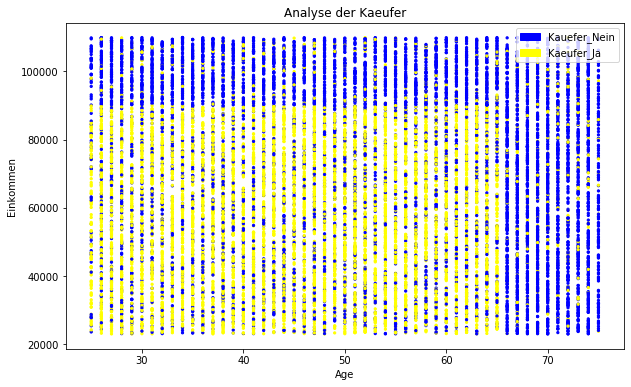

In [34]:
import matplotlib.patches as mpatches

categories = df["Kaeufer_Ja"]

colormap = np.array(['blue', 'yellow'])
plt.figure(figsize=(10,6))
plt.scatter(df["Age"], df["Einkommen"], c=colormap[categories], s=5)

Kauefer_Nein = mpatches.Patch(color='blue', label='Kauefer_Nein')
Kaeufer_Ja = mpatches.Patch(color='yellow', label='Kaeufer_Ja')

plt.legend(handles=[Kauefer_Nein,Kaeufer_Ja])

plt.title('Analyse der Kaeufer')
plt.xlabel('Age')
plt.ylabel('Einkommen')
plt.show()

-> Starke Abhängigkeit von Alter und Einkommen am Kaufverhalten des Kunden

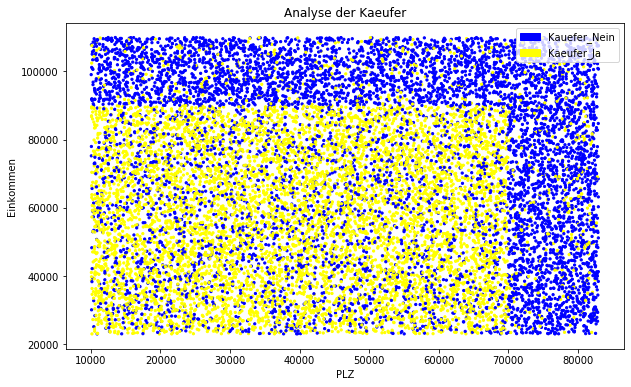

In [35]:
categories = df["Kaeufer_Ja"]

colormap = np.array(['blue', 'yellow'])
plt.figure(figsize=(10,6))
plt.scatter(df["PLZ"], df["Einkommen"], c=colormap[categories], s=5)

Kauefer_Nein = mpatches.Patch(color='blue', label='Kauefer_Nein')
Kaeufer_Ja = mpatches.Patch(color='yellow', label='Kaeufer_Ja')

plt.legend(handles=[Kauefer_Nein,Kaeufer_Ja])

plt.title('Analyse der Kaeufer')
plt.xlabel('PLZ')
plt.ylabel('Einkommen')
plt.show()

-> auch starke Abhängigkeit von PLZ am Kaufverhalten des Kunden

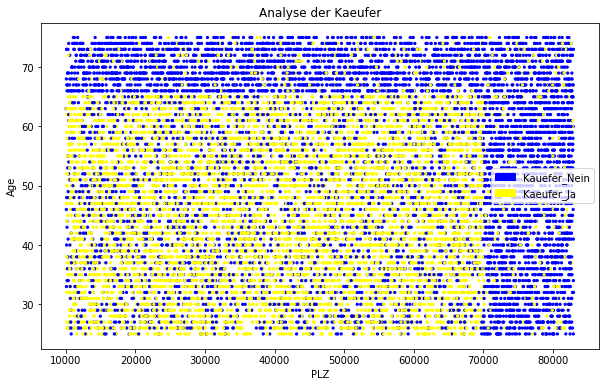

In [36]:
categories = df["Kaeufer_Ja"]

colormap = np.array(['blue', 'yellow'])
plt.figure(figsize=(10,6))
plt.scatter(df["PLZ"], df["Age"], c=colormap[categories], s=5)

Kauefer_Nein = mpatches.Patch(color='blue', label='Kauefer_Nein')
Kaeufer_Ja = mpatches.Patch(color='yellow', label='Kaeufer_Ja')

plt.legend(handles=[Kauefer_Nein,Kaeufer_Ja])

plt.title('Analyse der Kaeufer')
plt.xlabel('PLZ')
plt.ylabel('Age')
plt.show()

## Bonus Teil 2: 
Führen Sie eine nested Kreuzvalidierung (cross-validation) für den ausgewaehlten Features durch.

In [37]:
parameters = {'min_samples_split': (2,10,50)}
# max_depth= 30, min_samples_leaf = 5, n_estimators= 250
x_neu= df[["Age","Einkommen","PLZ"]]

model = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=parameters, cv=5)

scores = cross_val_score(model, x_neu, y, cv=5)
print("Score=",scores.mean())

Score= 0.8967333333333333


## Bonus Teil 3:

Gibt es einen Standard-Kauefer? Anders gesagt, gibt es einen typischen Kunde der hoechstwahrscheinlich kaeuft? 

Achtung: diese Aufgabe ist etwa schwrieger als die anderen. 

### Ein möglicher Kunde (HIER: Berücksichtung aller Features!)

In [38]:
df_kunden=df[df['Kaeufer_Ja'] == 1]
df_kunden_features = df_kunden.drop("Kaeufer_Ja", axis = 1)
df_kunden_features

,Height,Weight,Age,PLZ,Einkommen,Drink_Nein,Drink_Oft
0,165,102,35,16487,57098,1,0
1,198,61,47,45252,77040,0,1
2,191,68,73,75815,57805,0,1
5,179,82,33,43389,61841,0,0
7,172,79,61,34385,24842,0,1
...,...,...,...,...,...,...,...
14993,168,84,62,27433,50342,0,0
14994,182,86,33,28325,77245,0,0
14995,194,108,32,37499,31762,0,0
14997,186,93,45,58976,30662,0,0


In [39]:
X_kunden = df_kunden_features.values

In [40]:
from sklearn.cluster import MeanShift

clustering = MeanShift().fit(X_kunden)
clustering.labels_

clustering.predict(X_kunden)

clustering

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [41]:
labels = clustering.labels_
labels_unique=np.unique(labels)
n_clusters_ = len(labels_unique)

In [42]:
cluster_centers= clustering.cluster_centers_

In [43]:
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


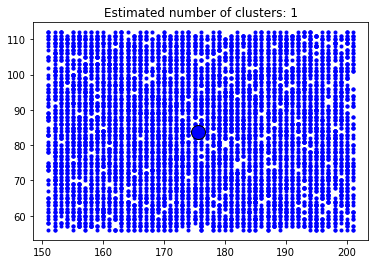

In [44]:
#  Anzeige des Centers im Parameterraum
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_kunden[my_members, 0], X_kunden[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [45]:
center=cluster_centers[[0][0]] # Umwandlung des verschachtelten Array

In [46]:
print("Möglicher Kunde:")
for feature in range(0,feature_names.size):
    print(str(feature_names[feature]) + ": " + str(round(center[feature])))

Möglicher Kunde:
Height: 176.0
Weight: 84.0
Age: 46.0
PLZ: 45327.0
Einkommen: 65428.0
Drink_Nein: 1.0
Drink_Oft: 0.0


Age, PLZ, Einkommen sind entscheidend, alle anderen Features sind aufgrund ihrer geringen Importance wenig aussagekräftig. Unten habe ich sie weggelassen.

### Jetzt: Typischer Kunde - Berücksichtigung der drei wichtigsten Features: Age, PLZ, Einkommen

In [47]:
df_important_features=df_kunden_features[["Age","PLZ","Einkommen"]]
df_important_features

,Age,PLZ,Einkommen
0,35,16487,57098
1,47,45252,77040
2,73,75815,57805
5,33,43389,61841
7,61,34385,24842
...,...,...,...
14993,62,27433,50342
14994,33,28325,77245
14995,32,37499,31762
14997,45,58976,30662


In [48]:
X_important = df_important_features.values

In [49]:
clustering = MeanShift().fit(X_important)
clustering.predict(X_important)
labels = clustering.labels_
labels_unique=np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


In [50]:
cluster_centers= clustering.cluster_centers_

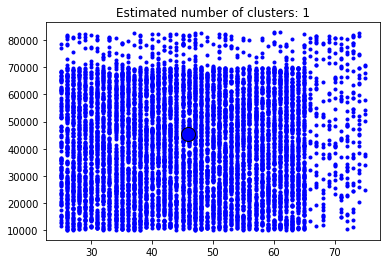

In [51]:
# Anzeige des Centers im Parameterraum
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_important[my_members, 0], X_important[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [52]:
center=cluster_centers[[0][0]]
feature_names = df_important_features.columns
print("Typischer Kunde:")
for feature in range(0,feature_names.size):
    print(str(feature_names[feature]) + ": " + str(round(center[feature])))

Typischer Kunde:
Age: 46.0
PLZ: 45327.0
Einkommen: 65428.0


Für Age, PLZ und Einkommen kommen die gleichen Werte raus wie oben mit allen Features.